# Demo: Rendering

This Demo will walk you through rendering a landmark file using the Blender API

## Initialize the notebook environment

Edit the `BUILD_DIR` path to reflect your build directory. `"../build/Release/"` is the default for Xcode. If you are using cmake and you followed my setup instructions, your build directory is `"../build/"`

In [1]:
BUILD_DIR="../build/"
!echo $BUILD_DIR

PYTHON_SCRIPT_DIR="../scripts/python/landmark_tools/"
!echo $PYTHON_SCRIPT_DIR

../build/
../scripts/python/landmark_tools/


In [2]:
!rm -r output/render
!mkdir -p output/render

import matplotlib.pyplot as plt
from PIL import Image

# This sys call is needed because the file is in another directory 
import sys
sys.path.insert(1, '../scripts/python/landmark_tools')
import visualize_corr
import landmark

## Dependencies

This demo assumes you have already followed the steps to [Install the tools](INSTALL.md).

You will need the following python libraries

- matplotlib
- numpy
- pillow
- bpy

Reload the jupyter kernel after installing these libraries.

We are going to use one of the landmark files generated by the [Moon Demo](example/MoonDemo.ipynb). Please run that notebook first.

## Blender Rendering

### Convert the landmark to a ply file

We are going to use one of the landmark files generated by the [Moon Demo](example/MoonDemo.ipynb). Please run that notebook first.

Landmark files can be converted to ply polygon mesh files using the `landmark_2_point` executable.

In [3]:
!$BUILD_DIR/landmark_2_point

Write a landmark to a ply mesh or pointcloud.
Usage for landmark_2_point:
------------------
  Required arguments:
    -landmark   <filename> - input lmkfile
    -ply  <filename> - output PLY filepath
  Optional arguments:
    -filetype <PLY_ASCII|PLY_LITTLE_ENDIAN|PLY_BIG_ENDIAN> - (default arch endian) warning: ascii is lossy
    -structure <POINTCLOUD|MESH> - (default MESH)
    -frame <WORLD|LOCAL|RASTER> - (default WORLD)


Use the -frame LOCAL option for rendering with the Blender script. It uses the coordinate system of the tangent plane which centers the mesh at the origin and makes it easier to compute the sun angle.

In [4]:
!$BUILD_DIR/landmark_2_point \
-landmark output/moon/Haworth_final_adj_5mpp_surf_10km.lmk \
-ply output/render/Haworth_final_adj_5mpp_surf_10km.ply \
-frame LOCAL

-landmark = output/moon/Haworth_final_adj_5mpp_surf_10km.lmk
-ply = output/render/Haworth_final_adj_5mpp_surf_10km.ply
-frame = LOCAL
#! LVS Map v3.0
Landmark file saved at output/render/Haworth_final_adj_5mpp_surf_10km.ply


After generating the mesh, render with `render_ply.py`. If you are starting from a large ply mesh (i.e. 50kmx50km), it will take several minutes. If you plan to do multiple renders, save a blend file to accelerate additional renders. Starting from the blend file saves some of the time to load the mesh. 

In [5]:
!python $PYTHON_SCRIPT_DIR/render_ply.py -h

usage: render_ply.py [-h] -height HEIGHT -width WIDTH -resolution RESOLUTION
                     [--save-blend-file]
                     file sun_elevation sun_azimuth output

Render given file with blender

positional arguments:
  file                  .ply file defining a DEM mesh in a local reference
                        frame OR a .blend file from a previous run.
  sun_elevation         sun elevation in degrees
  sun_azimuth           sun azimuth in degrees
  output                path to output file of rendered image

options:
  -h, --help            show this help message and exit
  -height HEIGHT        height of output image in pixels.
  -width WIDTH          width of output image in pixels
  -resolution RESOLUTION
                        resolution in meters/pixel of output image
  --save-blend-file     Save a new blend file for additional renders. This
                        option is recommended to accelerate additional
                        renders.


In [6]:
!python $PYTHON_SCRIPT_DIR/render_ply.py \
    output/render/Haworth_final_adj_5mpp_surf_10km.ply \
    4 120 \
    output/render/Haworth_final_adj_5mpp_surf_10km.png \
    -height 1000 \
    -width 1000 \
    -resolution 10

PLY import of 'Haworth_final_adj_5mpp_surf_10km.ply' took 239.00 ms
Fra:1 Mem:105.19M (Peak 105.19M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Haworth_final_adj_5mpp_surf_10km
Fra:1 Mem:259.47M (Peak 274.73M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:259.42M (Peak 274.73M) | Time:00:00.05 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:259.42M (Peak 274.73M) | Time:00:00.05 | Mem:0.00M,

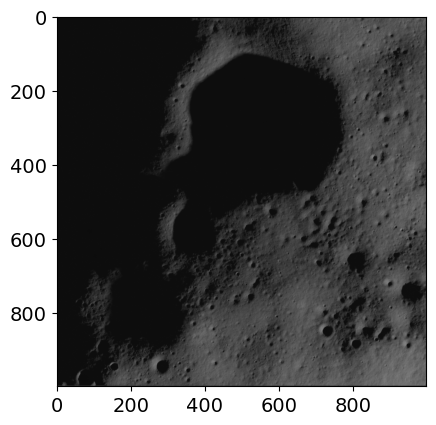

In [7]:
im = Image.open("output/render/Haworth_final_adj_5mpp_surf_10km.png")
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

After rendering with Blender, the generated png file needs to be added to the landmark file. For this, we can use the `add_srm` executable. 

In [8]:
!$BUILD_DIR/add_srm

Usage for add_srm:
Adds a surface image to an existing landmark file. The image must be the same dimensions and resolution as landmark structure. It must also be in an orthographic projection.
------------------
  Required arguments:
    -input   <filename> - input landmark filepath
    -output   <filename> - output landmark filepath
    -srm   <filename> - input surface image


In [9]:
!$BUILD_DIR/add_srm \
  -input output/moon/Haworth_final_adj_5mpp_surf_10km.lmk \
  -output output/render/Haworth_final_adj_5mpp_surf_10km_shaded.lmk \
  -srm output/render/Haworth_final_adj_5mpp_surf_10km.png

-input = output/moon/Haworth_final_adj_5mpp_surf_10km.lmk
-output = output/render/Haworth_final_adj_5mpp_surf_10km_shaded.lmk
-srm = output/render/Haworth_final_adj_5mpp_surf_10km.png
#! LVS Map v3.0
Landmark file written to: output/render/Haworth_final_adj_5mpp_surf_10km_shaded.lmk


Text(0.5, 1.0, 'Surface Reflectance')

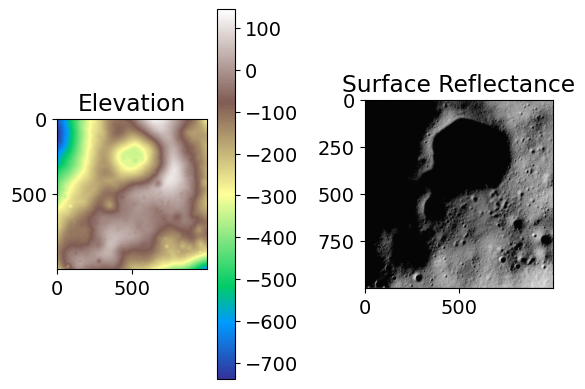

In [10]:
L = landmark.Landmark("output/render/Haworth_final_adj_5mpp_surf_10km_shaded.lmk")

plt.subplot(1,5,(1,2))
plt.imshow(L.ele, cmap='terrain')
plt.colorbar()
plt.title("Elevation")

plt.subplot(1,5,(4,5))
plt.imshow(L.srm, cmap='gray')
plt.title("Surface Reflectance")

We also provide a script for doing multiple renders in a batch. The sun angles are listed in a csv file with the format 
```
timestamp, elevation_in_degrees, azimuth_in_degrees
```

In [11]:
!python $PYTHON_SCRIPT_DIR/batch_render.py -h

usage: batch_render.py [-h] -height HEIGHT -width WIDTH -resolution RESOLUTION
                       [--save-blend-file]
                       file angle_csv

Render a batch of different sun angles with blender

positional arguments:
  file                  plyfile defining a DEM mesh in a local reference frame
                        OR a blend file from a previous run
  angle_csv             CSV file containing one line per desired sun angle.
                        Line format is <timestamp, elevation_in_degrees,
                        azimuth_in_degrees>

options:
  -h, --help            show this help message and exit
  -height HEIGHT        height of output image in pixels.
  -width WIDTH          width of output image in pixels
  -resolution RESOLUTION
                        resolution in meters/pixel of output image
  --save-blend-file     Save a new blend file for additional renders. This
                        option is recommended to accelerate additional
              